In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

Let us load the student's data and split it into the 19-20 and 20-21 a.y.

In [54]:
students_1920 = pd.read_excel("./students_data.xlsx","1920")
students_1920= students_1920.set_index("Student Id")

students_2021 = pd.read_excel("./students_data.xlsx","2021")
students_2021= students_2021.set_index("Student Id")

Check that the students are correctly loaded

In [55]:
students_1920.head()

,Entry Test,Pillar I Test,Team Work Pillar I,Pillar II Test,Team Work Pillar II,Pillar III Test,Team Work Pillar III,Pillar IV Test,Team Work Pillar IV,Pillar V Test,Team Work Pillar V,Final thesis (110)
Student Id,,,,,,,,,,,,
1,24,28,25,21,30,30,27,17,29,20,28,102
2,15,23,23,26,30,20,27,30,29,14,26,101
3,21,15,25,13,25,0,27,11,29,6,28,95
4,24,30,26,23,28,23,27,21,29,26,26,105
5,28,30,29,24,30,30,28,26,29,20,27,111


In [56]:
students_2021.head()

,Entry Test,Pillar I Test,Team Work Pillar I,Pillar II Test,Team Work Pillar II,Pillar III Test,Team Work Pillar III,Pillar IV Test,Team Work Pillar IV,Pillar V Test,Team Work Pillar V,Final thesis (110)
Student Id,,,,,,,,,,,,
1,23,26,29,18,30,24,27,18,30,18,27,0
2,23,20,31,21,30,18,27,15,30,18,26,100
3,27,26,31,24,30,25,27,23,30,30,26,105
4,17,26,29,21,30,26,27,17,30,16,27,105
5,21,30,29,24,29,31,26,24,29,28,26,111


We do not need to analyze the final thesis mark, thus we delete it in our analysis

In [57]:
students_1920= students_1920.iloc[:, : -1]
students_2021= students_2021.iloc[:, : -1]

# A.Y. 19-20
Plot the histograms representing each of the student's topics and the related marks distribution

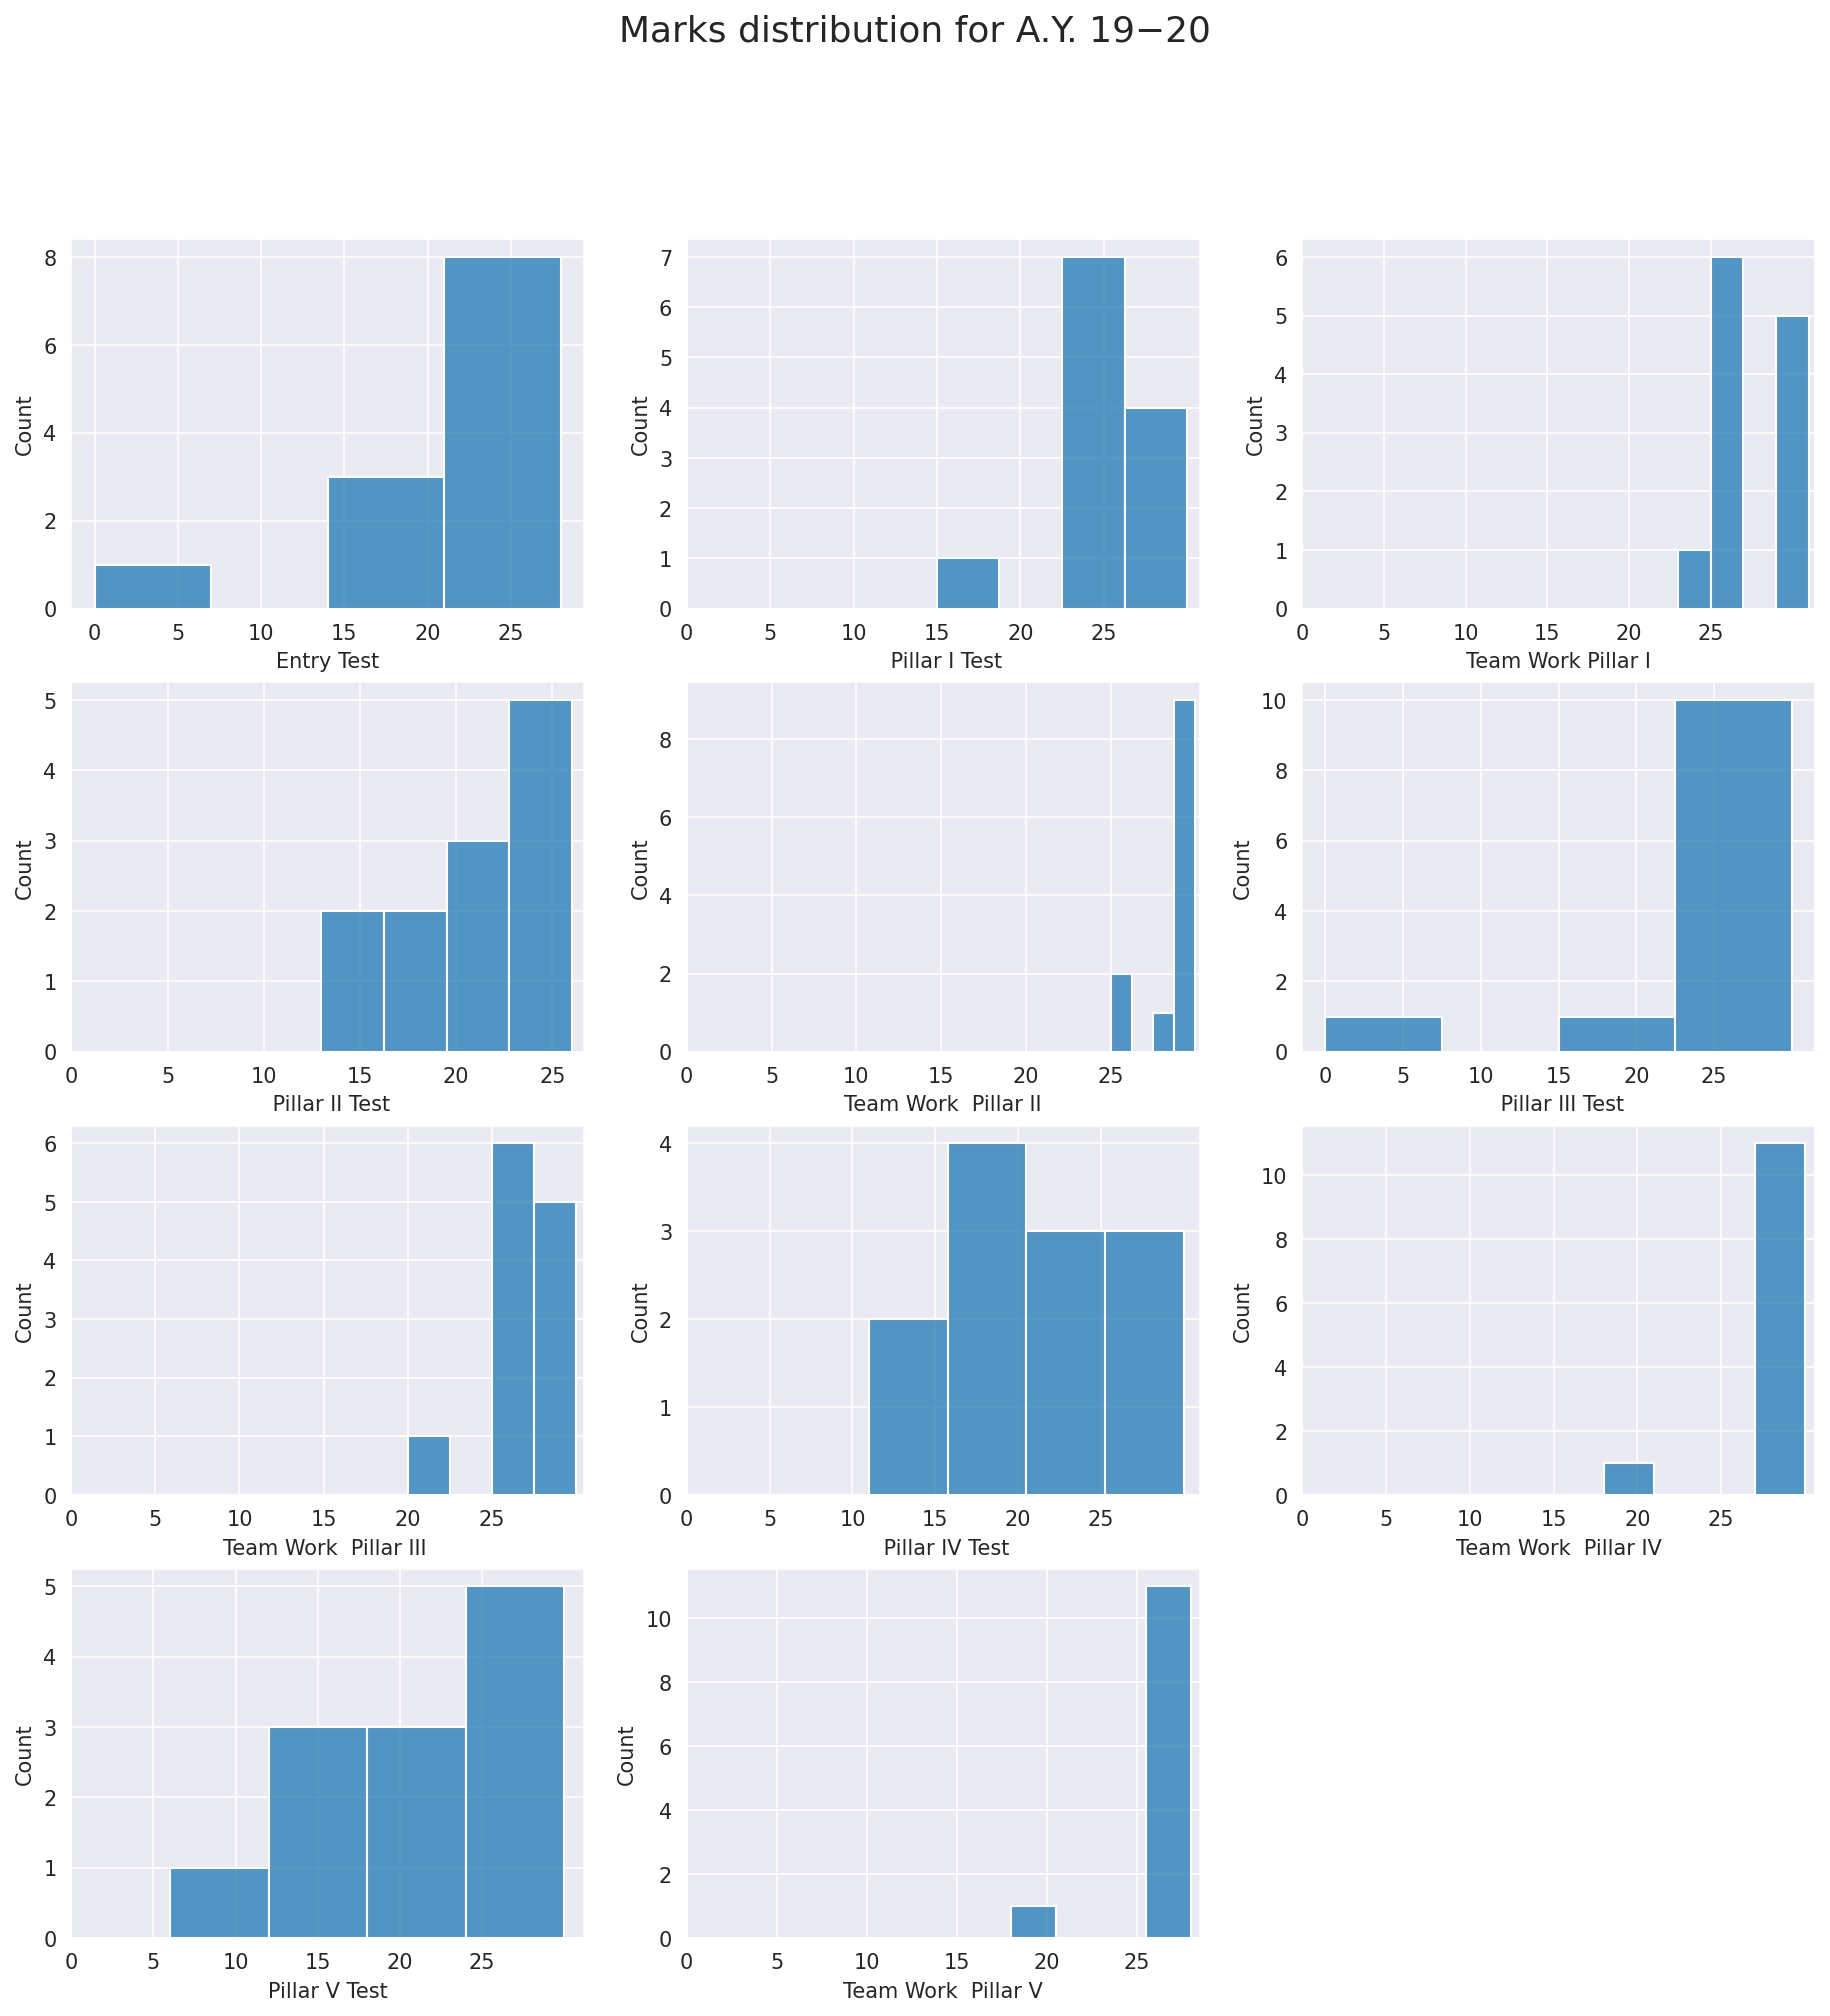

In [58]:
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(15,15), dpi=150)
plt.suptitle("Marks distribution for A.Y. 19−20", size="xx-large")

for col, ax in zip(students_1920.columns, axes.flat):
    data = students_1920[col]
    sns.histplot(data=data, bins=4, ax=ax)
    ax.set_xticks(range(0,30,5))

for ax in axes.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)

plt.savefig("images/1920-plots.png")

# A.Y. 20-21
Plot the histograms representing each of the student’s subjects and the related marks distribution

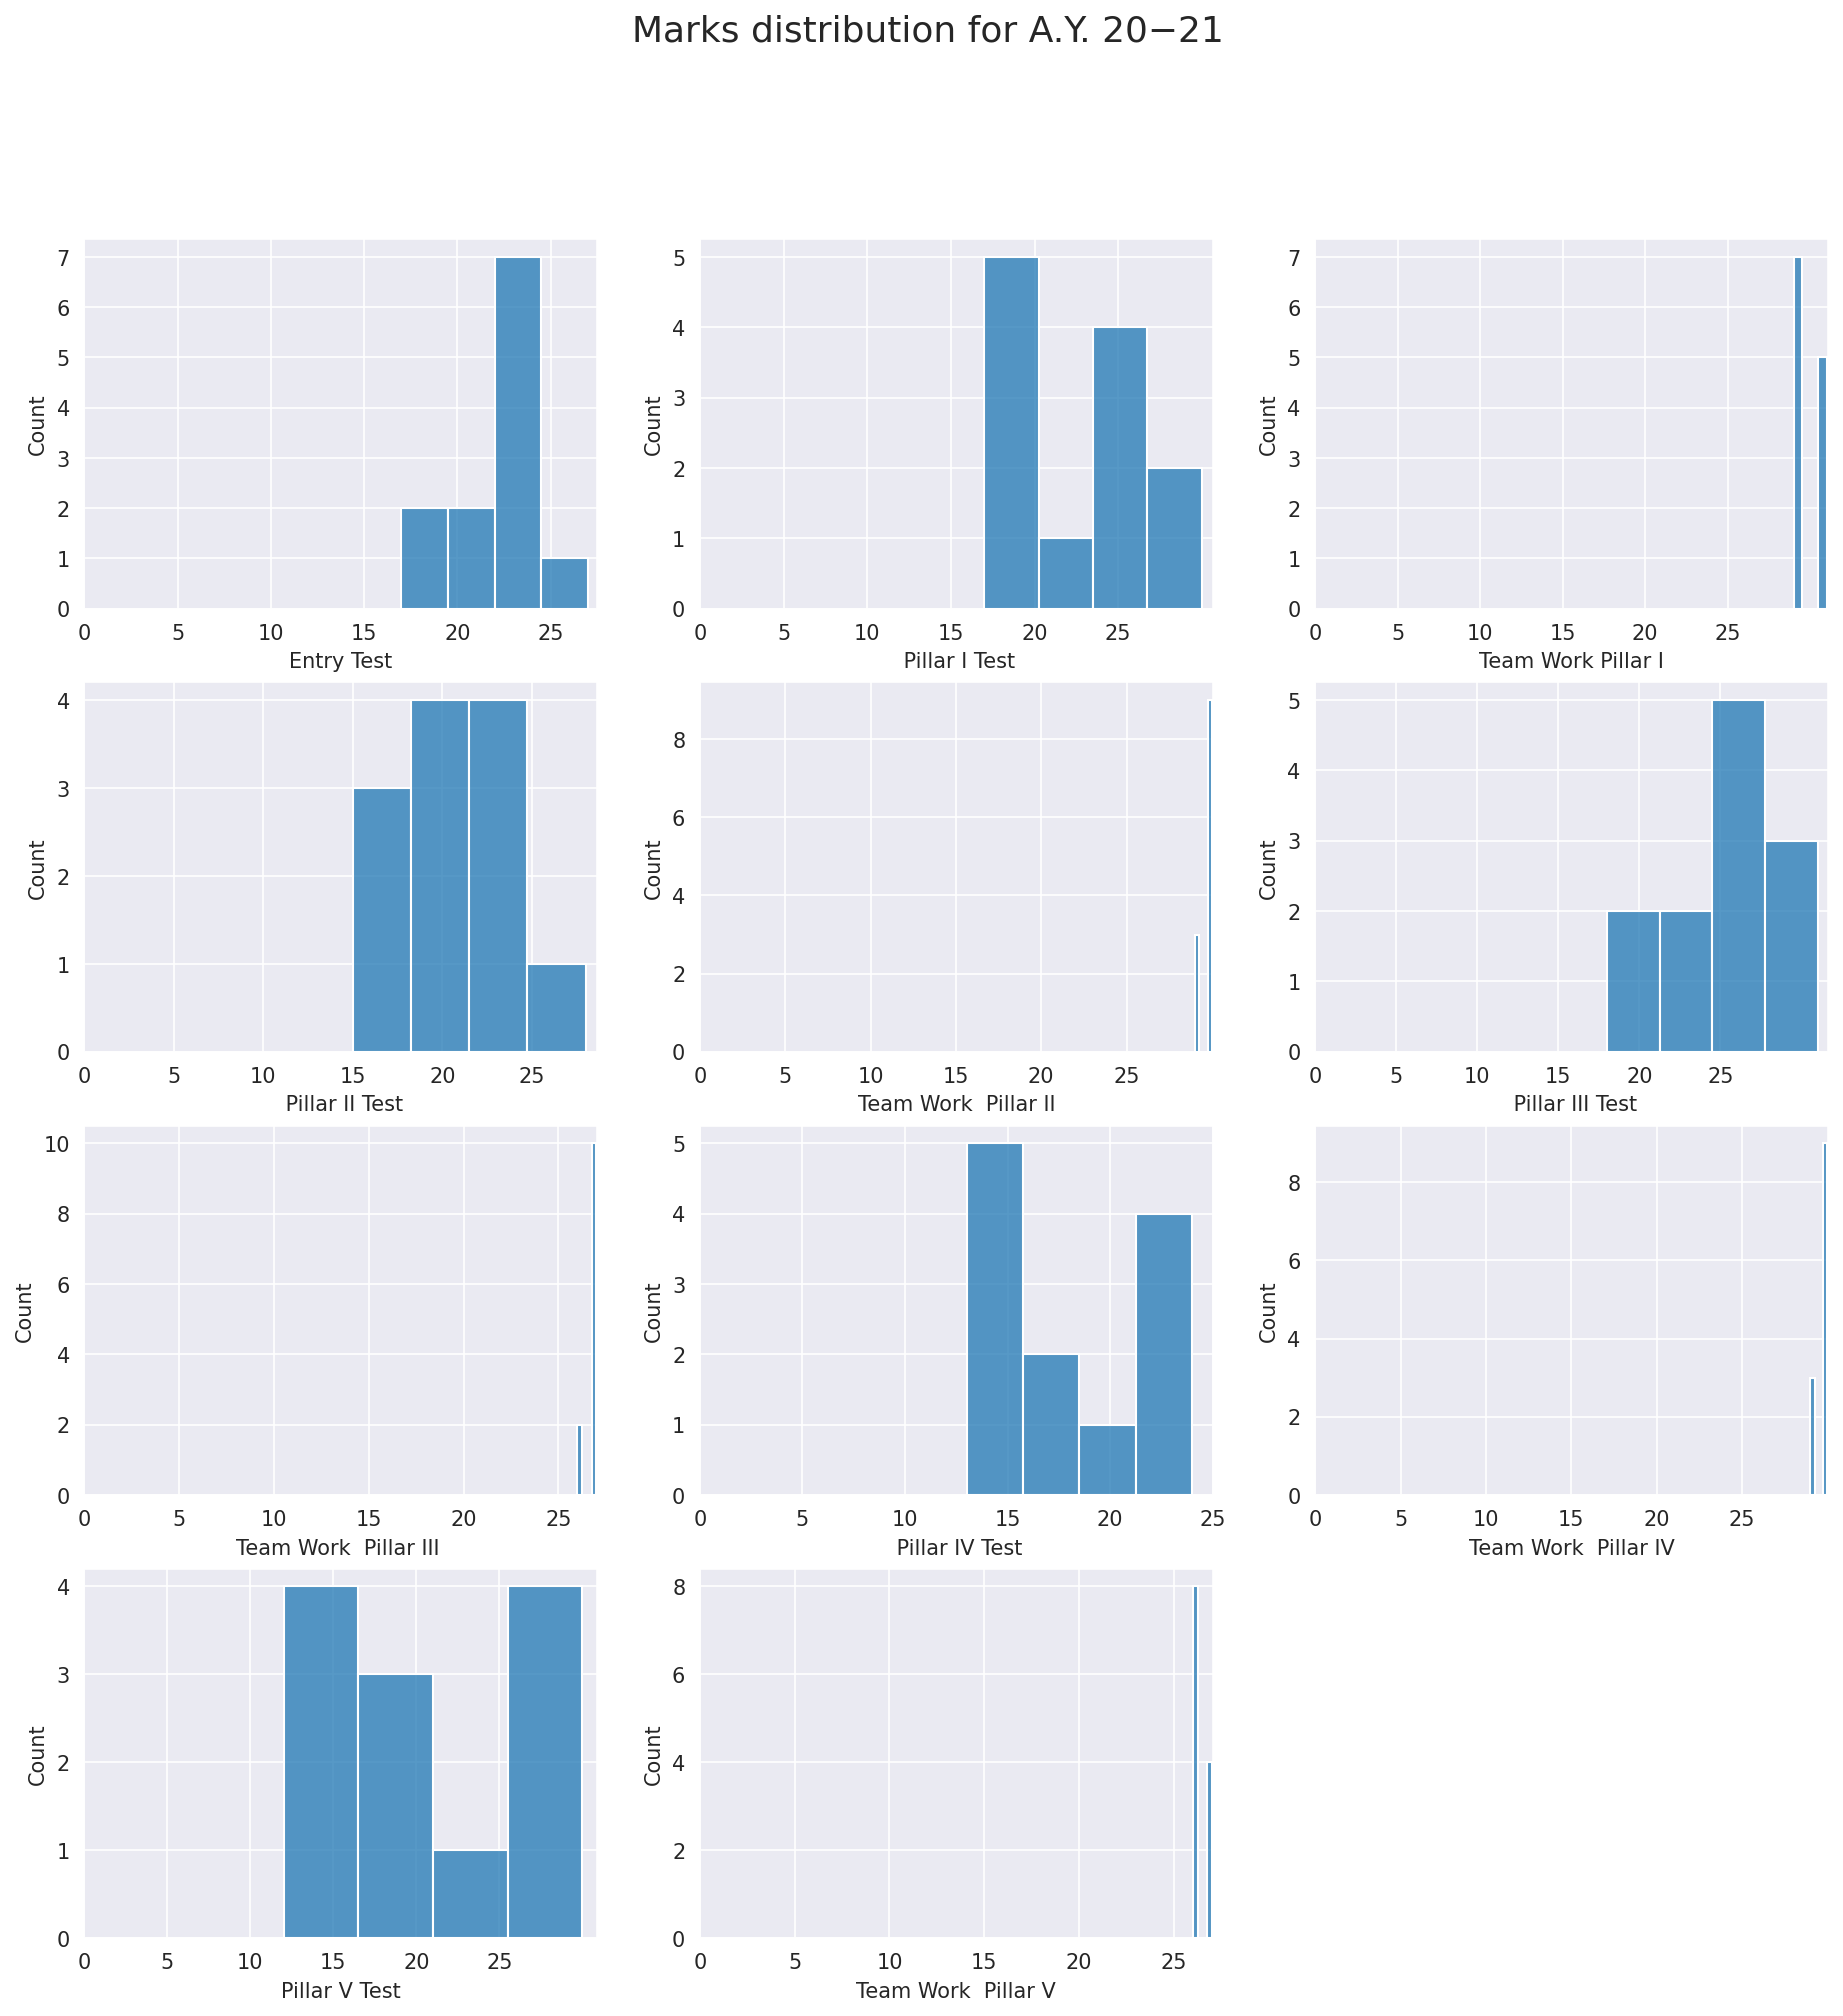

In [59]:
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(15,15), dpi=150)
plt.suptitle("Marks distribution for A.Y. 20−21", size="xx-large")

for col, ax in zip(students_2021.columns, axes.flat):
    data = students_2021[col]
    sns.histplot(data=data, bins=4, ax=ax)
    ax.set_xticks(range(0,30,5))

for ax in axes.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)

fig.savefig("images/2021-plots")

We perform some statistical tests

In [60]:
data = pd.DataFrame()
for col in students_1920.columns:
    avg_dif = students_1920[col].mean() - students_2021[col].mean()
    col_test = mannwhitneyu(students_1920[col], students_2021[col])
    row = {"Topic": col, "Score": col_test[0], "p-value": col_test[1], "Avg 19-20": students_1920[col].mean(), "Avg 20-21": students_2021[col].mean(), "Avg Difference": avg_dif}
    data = pd.concat([data, pd.DataFrame([row])], ignore_index=True)

data

,Topic,Score,p-value,Avg 19-20,Avg 20-21,Avg Difference
0,Entry Test,61.0,0.537480,19.666667,22.416667,-2.750000
1,Pillar I Test,95.0,0.188657,25.333333,23.000000,2.333333
2,Team Work Pillar I,35.5,0.029036,27.166667,29.833333,-2.666667
3,Pillar II Test,65.0,0.703492,20.333333,21.166667,-0.833333
4,Team Work Pillar II,61.5,0.470637,28.916667,29.750000,-0.833333
5,Pillar III Test,72.0,1.000000,23.916667,25.250000,-1.333333
6,Team Work Pillar III,102.0,0.042035,27.333333,26.833333,0.500000
7,Pillar IV Test,89.5,0.323279,20.583333,18.166667,2.416667
8,Team Work Pillar IV,34.5,0.015573,28.333333,29.750000,-1.416667
9,Pillar V Test,76.5,0.816021,20.666667,20.500000,0.166667


Plot the student's marks trend among the different subjects

In [61]:
students_1920=students_1920.transpose(copy=True)
students_2021=students_2021.transpose(copy=True)

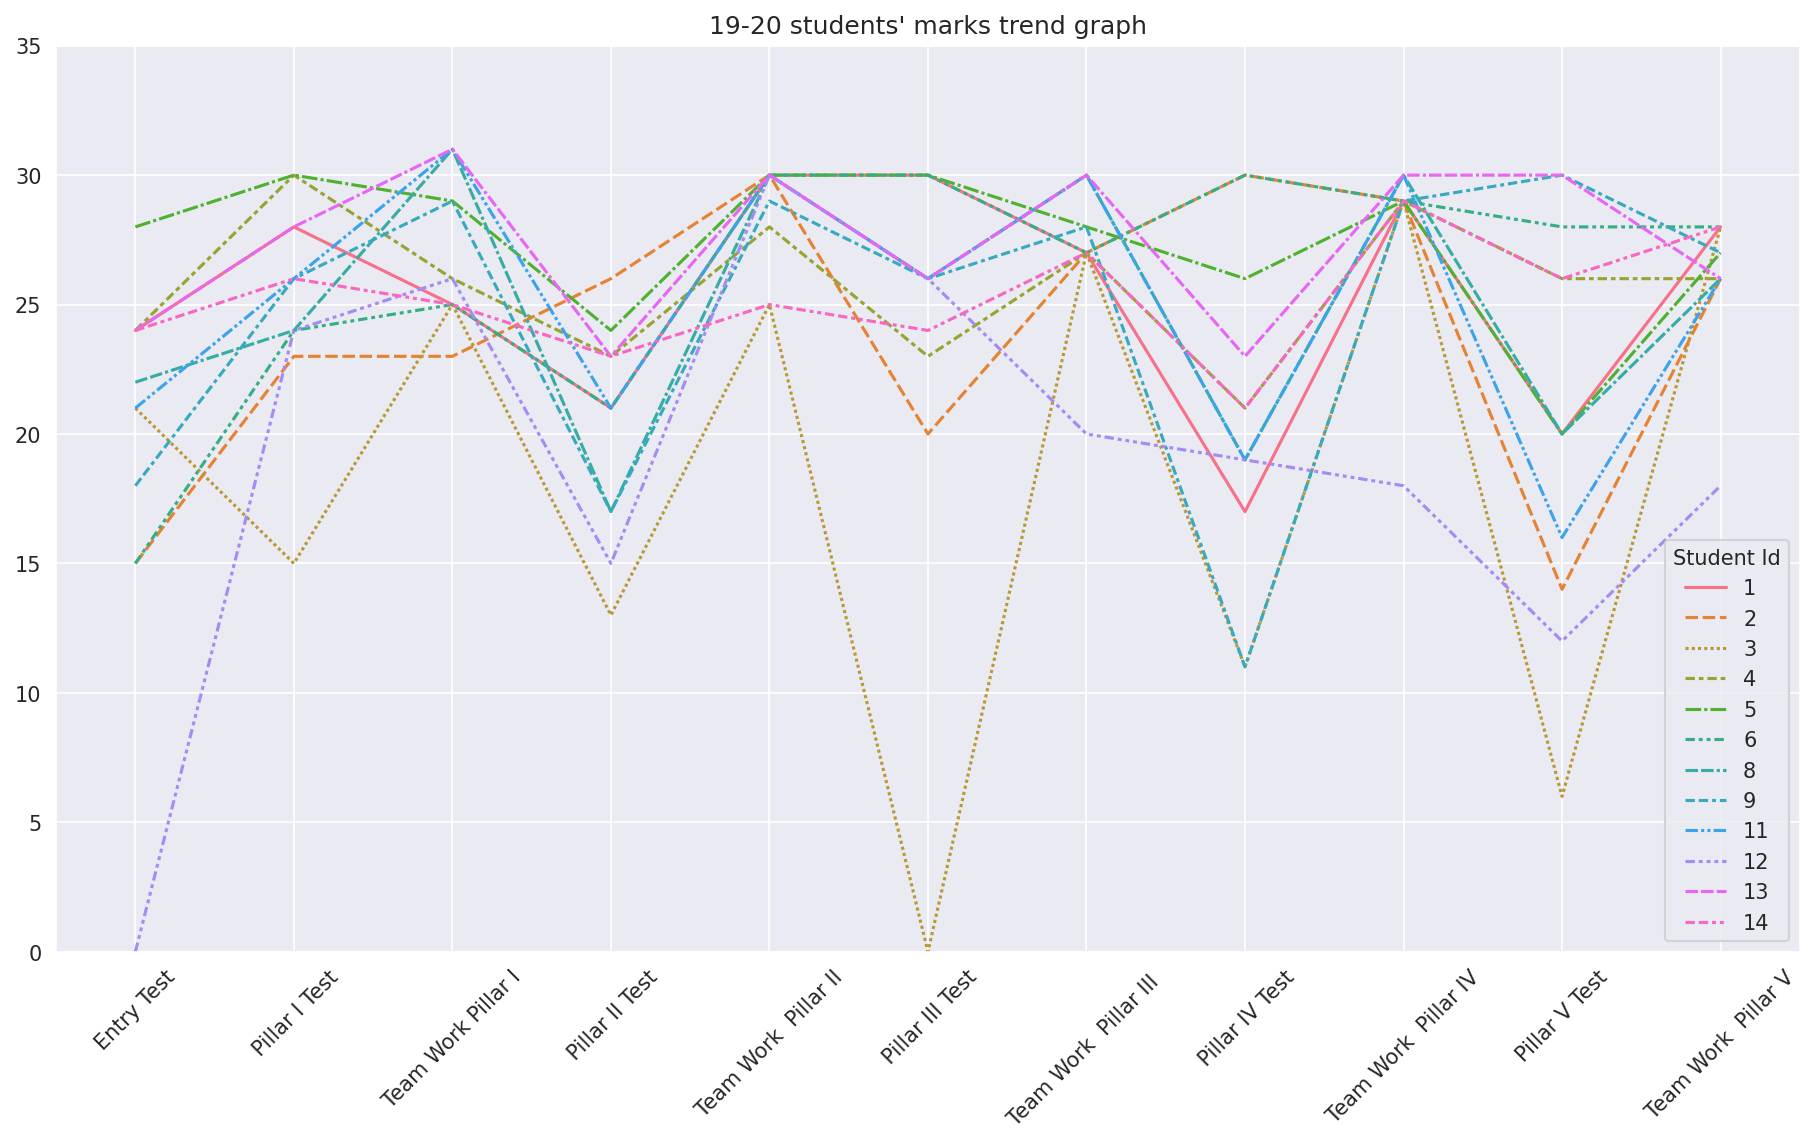

In [62]:
plt.figure(figsize=(15,8), dpi=150)
plt.xticks(rotation = 45)
plt.ylim((0,35))
sns.lineplot(data=students_1920)
plt.title("19-20 students' marks trend graph")
plt.savefig("images/1920")

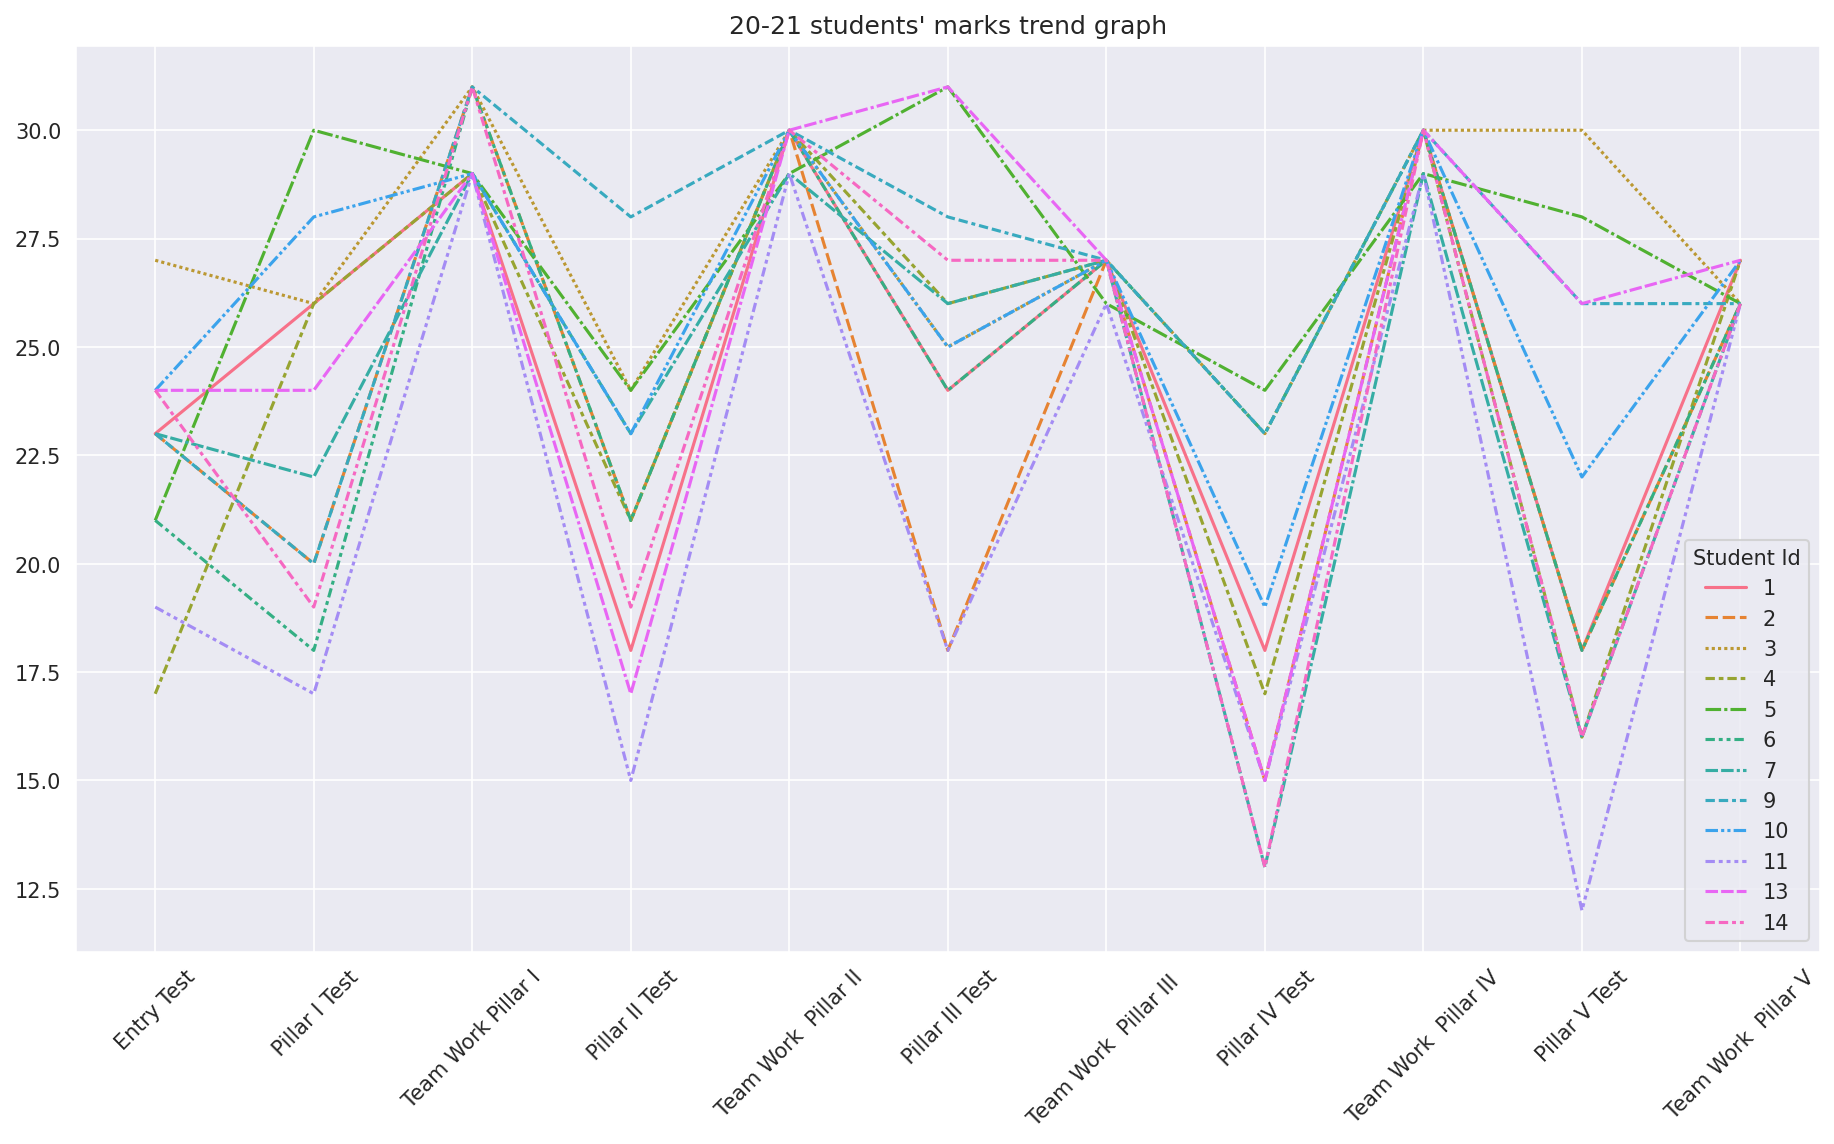

In [63]:
plt.figure(figsize=(15,8), dpi=150)
plt.xticks(rotation = 45)

sns.lineplot(data=students_2021)
plt.title("20-21 students' marks trend graph")
plt.savefig("images/2021")